# Weather forecast

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from functools import reduce
# pd.set_option('display.float_format', lambda x: '%.1f' % x)

d = ['outlook','temp','hum','windy']
t = 'play'
df = pd.read_csv('../../datasets/weather_forecast.bayes.csv', sep=',', names=d + [t], header=0)
df["play"] = df["play"] == "Yes"
df.describe()

,outlook,temp,hum,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,True
freq,5,6,7,8,9


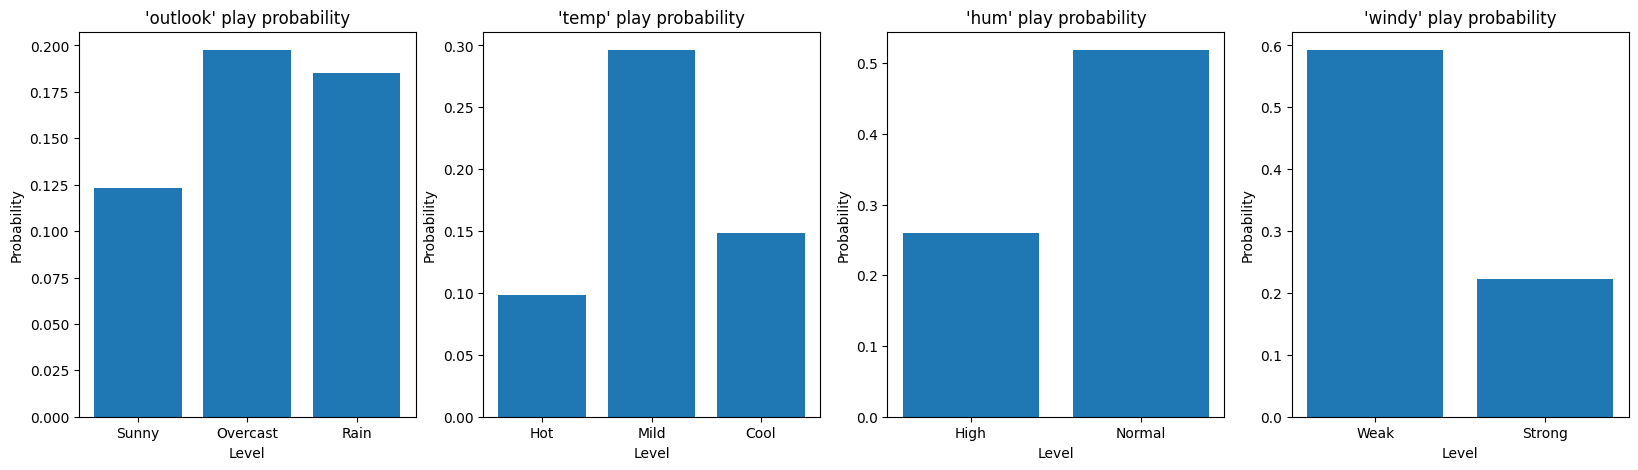

In [165]:
t_prob = df[df[t]].shape[0] / df[t].shape[0]

def bayes_probs(d):
    d_prob = lambda l: df[df[d] == l].shape[0] / df[t].shape[0]

    # P(d|t) = P(d ∩ t) / P(t)
    # td_prob = lambda l: (df[(df[d] == l) & df[t]].shape[0] / df[t].shape[0]) /  t_prob
    td_prob = lambda l: df[(df[d] == l) & df[t]].shape[0] / df[df[t]].shape[0]

    # P(t|d) = ( P(t|d) * P(d) ) / P(t)
    bayes = lambda l: (td_prob(l) * d_prob(l)) / t_prob
    
    return np.array([bayes(l) for l in df[d].unique()])

plt.subplots(nrows=1,ncols=4, figsize=(20,5))

for i in range(len(d)):
    plt.subplot(1, len(d), i+1)
    plt.bar(df[d[i]].unique(), bayes_probs(d[i]))
    plt.title(f"'{d[i]}' play probability")
    plt.xlabel("Level")
    plt.ylabel("Probability")
plt.show()

$$ \text{Naive bayes = } (\prod_{i=l}^m P(q_i|t = l)) * P(t=l)$$

In [181]:
t_prob = df[df[t]].shape[0] / df[t].shape[0]
td_prob = lambda d,l: df[(df[d] == l) & df[t]].shape[0] / df[df[t]].shape[0]
df['prob'] = df.apply(lambda r: reduce(lambda a, b: a * td_prob(b, r[b]), d, 1) * t_prob, axis=1)

t_prob_not = df[~df[t]].shape[0] / df[t].shape[0]
td_prob_not = lambda d,l: df[(df[d] == l) & ~df[t]].shape[0] / df[~df[t]].shape[0]
df['prob_not'] = df.apply(lambda r: reduce(lambda a, b: a * td_prob_not(b, r[b]), d, 1) * t_prob_not, axis=1)

df['pred'] = df['prob'] > df['prob_not']

df

,outlook,temp,hum,windy,play,prob,prob_not,pred
0,Sunny,Hot,High,Weak,False,0.007055,0.027429,False
1,Sunny,Hot,High,Strong,False,0.003527,0.041143,False
2,Overcast,Hot,High,Weak,True,0.014109,0.000000,True
3,Rain,Mild,High,Weak,True,0.021164,0.018286,True
4,Rain,Cool,Normal,Weak,True,0.031746,0.002286,True
5,Rain,Cool,Normal,Strong,False,0.015873,0.003429,True
6,Overcast,Cool,Normal,Strong,True,0.021164,0.000000,True
7,Sunny,Mild,High,Weak,False,0.014109,0.027429,False
8,Sunny,Cool,Normal,Weak,True,0.021164,0.003429,True
9,Rain,Mild,Normal,Weak,True,0.042328,0.004571,True
